<a href="https://colab.research.google.com/github/Lightning51B/Caltech-AI-ML/blob/main/cnn_with_cifar10_20241208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers, models, datasets, losses, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The CIFAR-10 dataset is a widely used benchmark dataset in the field of computer vision. It stands for the Canadian Institute for Advanced Research (CIFAR), where it was originally developed. The dataset consists of 60,000 color images, each of size 32x32 pixels, belonging to 10 different classes. Each class contains 6,000 images.

The 10 classes in the CIFAR-10 dataset are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

The dataset is split into a training set and a test set, with 50,000 images in the training set and 10,000 images in the test set. It's commonly used for developing and benchmarking machine learning models, particularly in tasks like image classification, object detection, and image segmentation.

### Importing The Data

In [ ]:
# import the data
cifar10 = datasets.cifar10

# split the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [ ]:
print(X_test.shape, X_train.shape)

(10000, 32, 32, 3) (50000, 32, 32, 3)


In [ ]:
#normalize the data (0,255) -> (0,1)
X_train, X_test = X_train/255.0, X_test/255.0

### Plotting A Sample of The Images

In [ ]:
classes = ['Airplane'
          ,'Automobile'
          ,'Bird'
          ,'Cat'
          ,'Deer'
          ,'Dog'
          ,'Frog'
          ,'Horse'
          ,'Ship'
          ,'Truck']

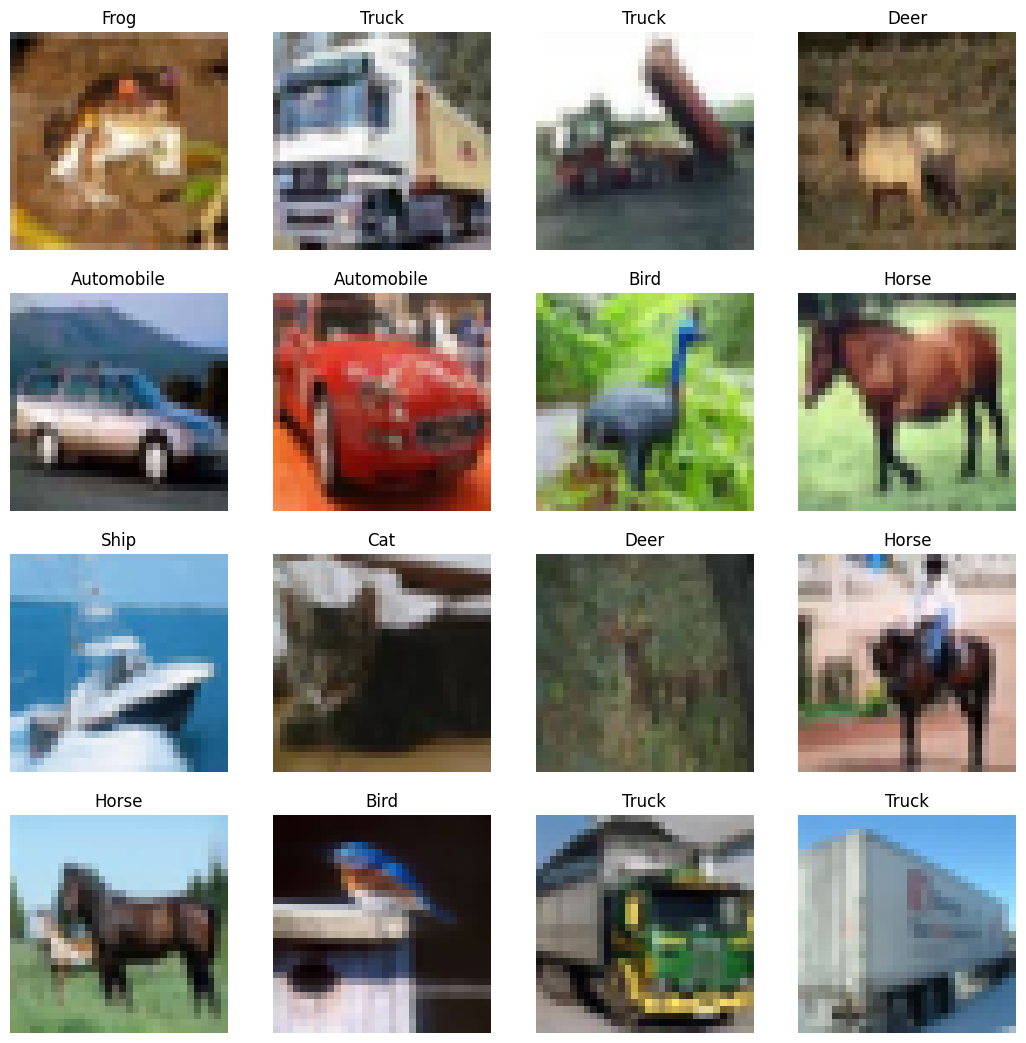

In [ ]:
plt.figure(figsize=(13,13))

for img in range(16):
  plt.subplot(4,4,img+1)
  plt.imshow(X_train[img])
  plt.axis('off')
  plt.title(classes[y_train[img][0]])

The application of classifiying images that are blurred or heavily pixelated is very important.

### Data Augmentation

In [ ]:
#define the augmentation methods
data_gen = ImageDataGenerator(rotation_range=1,
                              width_shift_range=.02,
                              zoom_range=0.01,
                              horizontal_flip=True)

In [ ]:
# apply augmentation on the train data
train_generator = data_gen.flow(X_train, y_train, batch_size=32)

### Building The CNN Model
We'll build the following components:
1. Conv Layer with 32 filters, 3x3 kernel, and 1 stride
2. Max Pool (2x2)
3. Conv Layer with 64 filters, 3x3 kernel, and 1 stride
4. Max Pool (2x2)
5. Fully Connected Layer:
  1. Flatten
  2. Hidden Layer with 128 neurons
  3. Output Layer with 10 output neurons

In [ ]:
cnn_model = models.Sequential([])
#add components
cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', strides=(1,1)))
cnn_model.add(layers.MaxPool2D((2,2)))
cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', strides=(1,1)))
cnn_model.add(layers.MaxPool2D((2,2)))

# fully connected layer
cnn_model.add(layers.Flatten()) #input layer (flattened)
cnn_model.add(layers.Dense(128, activation='relu')) #hidden layer
cnn_model.add(layers.Dense(10, activation='softmax')) #output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### Compile and Fit The Model

In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
#train the model
epochs = 15
cnn_model_hist = cnn_model.fit(train_generator, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.3965 - loss: 1.6723 - val_accuracy: 0.5634 - val_loss: 1.2378
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5928 - loss: 1.1613 - val_accuracy: 0.6297 - val_loss: 1.0596
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6472 - loss: 1.0156 - val_accuracy: 0.6507 - val_loss: 1.0200
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6726 - loss: 0.9413 - val_accuracy: 0.6701 - val_loss: 0.9631
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.6922 - loss: 0.8820 - val_accuracy: 0.6752 - val_loss: 0.9522
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7055 - loss: 0.8401 - val_accuracy: 0.6881 - val_loss: 0.9204
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7206 - loss: 0.8032 - val_accuracy: 0.6899 - val_loss: 0.9198
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7370 - loss: 0.76

### Visualize Augmented Images

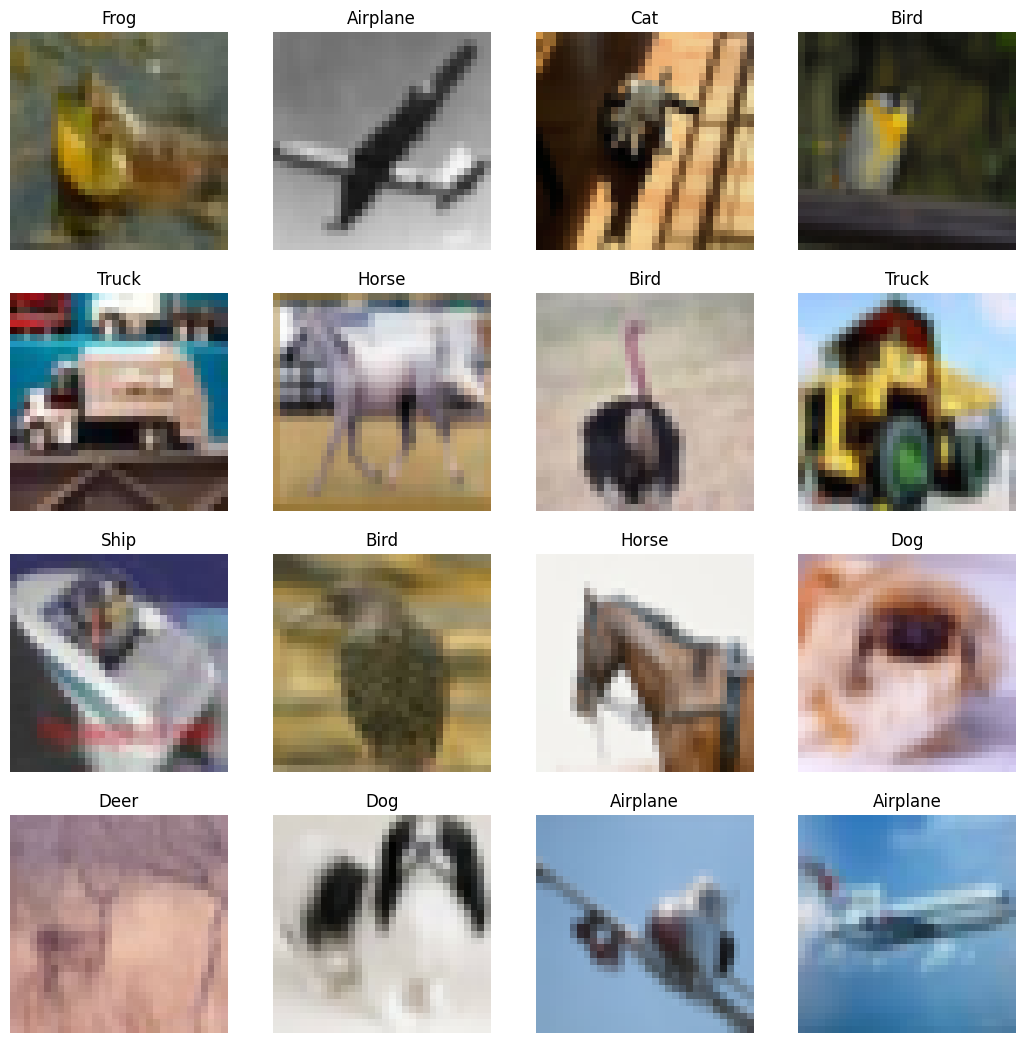

In [ ]:
#get aug images data
aug_images, labels = next(train_generator)

plt.figure(figsize=(13,13))

for img in range(16):
  plt.subplot(4,4,img+1)
  plt.imshow(aug_images[img])
  plt.axis('off')
  plt.title(classes[labels[img][0]])

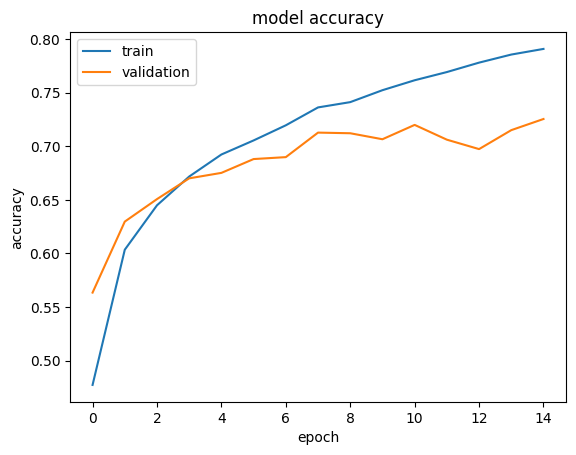

In [ ]:
plt.plot(cnn_model_hist.history['accuracy'])
plt.plot(cnn_model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')